# Add meaningful lables to raw output data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

In [2]:
#DATADIR = '../rundirs/geosfp_4x5_standard/KPP_fields/'
DATADIR = '../rundirs/geosfp_4x5_HetChemOff/'

CODEDIR = '../Code.12.0.0/'

In [3]:
ds = xr.open_dataset(DATADIR+'KPP_fields_100.nc')
ds

<xarray.Dataset>
Dimensions:   (lat: 46, lev: 72, lon: 72, nphotol: 130, nphy: 4, nreact: 725, nspec: 240)
Dimensions without coordinates: lat, lev, lon, nphotol, nphy, nreact, nspec
Data variables:
    C_before  (lev, lat, lon, nspec) float64 5.722e+03 1.662e+06 1.446e+05 ...
    C_after   (lev, lat, lon, nspec) float64 5.722e+03 1.662e+06 1.446e+05 ...
    PHOTOL    (lev, lat, lon, nphotol) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    PHY       (lev, lat, lon, nphy) float64 203.3 703.9 2.508e+19 1.243e+14 ...
    RCONST    (lev, lat, lon, nreact) float64 1.872e-15 1.668e-14 8.976e-16 ...

In [4]:
ds.nbytes/1e9

2.554426368

In [5]:
def read_varnames(codefile):
    with open (codefile, "r") as f:
        code_str = f.readlines()

    varnames = []

    pattern = 'INTEGER, PARAMETER :: ind_'
    for line in code_str:
        if pattern in line:
            varnames.append( line.replace(pattern,'').split()[0] )

    return varnames

In [6]:
spec_names = read_varnames(CODEDIR+'KPP/Standard/gckpp_Parameters.F90')
print(len(spec_names), spec_names)

240 ['CH2I2', 'CH2ICl', 'CH2IBr', 'AERI', 'CO2', 'INDIOL', 'ISALA', 'ISALC', 'ISN1OA', 'ISN1OG', 'LBRO2H', 'LBRO2N', 'LISOPOH', 'LISOPNO3', 'LTRO2H', 'LTRO2N', 'LVOCOA', 'LVOC', 'LXRO2H', 'LXRO2N', 'MSA', 'PYAC', 'SO4H1', 'SO4H2', 'SOAGX', 'SOAIE', 'SOAME', 'IMAE', 'SOAMG', 'POx', 'LOx', 'PCO', 'LCO', 'PSO4', 'LCH4', 'PH2O2', 'I2O4', 'DHDN', 'DHDC', 'I2O2', 'MONITA', 'BENZ', 'CH3CCl3', 'CH3I', 'H1301', 'H2402', 'I2O3', 'PMNN', 'PPN', 'TOLU', 'BrNO2', 'CCl4', 'CFC11', 'CFC12', 'CFC113', 'CFC114', 'CFC115', 'H1211', 'IBr', 'IEPOXD', 'INO', 'N2O', 'TRO2', 'BRO2', 'IEPOXA', 'IEPOXB', 'IONITA', 'N', 'OCS', 'XRO2', 'HI', 'MAP', 'CHBr3', 'ICl', 'CH2Cl2', 'IMAO3', 'CHCl3', 'MPN', 'Cl2O2', 'CH2Br2', 'ETP', 'HCFC123', 'ClNO2', 'HCFC141b', 'HCFC142b', 'IONO', 'HCFC22', 'OIO', 'RA3P', 'RB3P', 'XYLE', 'DMS', 'CH3Cl', 'CH3Br', 'HNO4', 'ClOO', 'HNO2', 'OClO', 'PAN', 'RP', 'PP', 'PRPN', 'SO4', 'ALK4', 'PIP', 'R4P', 'HPALD', 'BrCl', 'C3H8', 'DHPCARP', 'HOI', 'IAP', 'HPC52O2', 'VRP', 'ATOOH', 'Br2', 'HC

In [7]:
ds.coords['nspec'] = xr.DataArray(spec_names, dims='nspec')
ds

<xarray.Dataset>
Dimensions:   (lat: 46, lev: 72, lon: 72, nphotol: 130, nphy: 4, nreact: 725, nspec: 240)
Coordinates:
  * nspec     (nspec) <U8 'CH2I2' 'CH2ICl' 'CH2IBr' 'AERI' 'CO2' 'INDIOL' ...
Dimensions without coordinates: lat, lev, lon, nphotol, nphy, nreact
Data variables:
    C_before  (lev, lat, lon, nspec) float64 5.722e+03 1.662e+06 1.446e+05 ...
    C_after   (lev, lat, lon, nspec) float64 5.722e+03 1.662e+06 1.446e+05 ...
    PHOTOL    (lev, lat, lon, nphotol) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    PHY       (lev, lat, lon, nphy) float64 203.3 703.9 2.508e+19 1.243e+14 ...
    RCONST    (lev, lat, lon, nreact) float64 1.872e-15 1.668e-14 8.976e-16 ...

## Sanity check

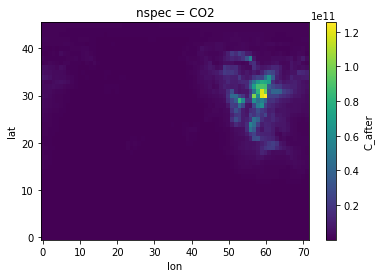

In [8]:
ds['C_after'].sel(nspec='CO2')[0].plot()

In [9]:
ds.coords['nphy'] = xr.DataArray(['TEMP', 'PRESS', 'NUMDEN', 'H2O'], dims='nphy')
ds

<xarray.Dataset>
Dimensions:   (lat: 46, lev: 72, lon: 72, nphotol: 130, nphy: 4, nreact: 725, nspec: 240)
Coordinates:
  * nspec     (nspec) <U8 'CH2I2' 'CH2ICl' 'CH2IBr' 'AERI' 'CO2' 'INDIOL' ...
  * nphy      (nphy) <U6 'TEMP' 'PRESS' 'NUMDEN' 'H2O'
Dimensions without coordinates: lat, lev, lon, nphotol, nreact
Data variables:
    C_before  (lev, lat, lon, nspec) float64 5.722e+03 1.662e+06 1.446e+05 ...
    C_after   (lev, lat, lon, nspec) float64 5.722e+03 1.662e+06 1.446e+05 ...
    PHOTOL    (lev, lat, lon, nphotol) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    PHY       (lev, lat, lon, nphy) float64 203.3 703.9 2.508e+19 1.243e+14 ...
    RCONST    (lev, lat, lon, nreact) float64 1.872e-15 1.668e-14 8.976e-16 ...

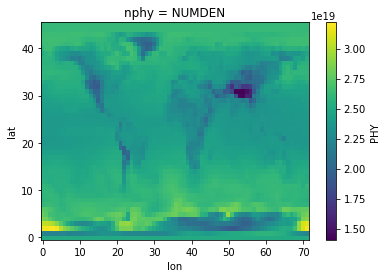

In [10]:
ds['PHY'].sel(nphy='NUMDEN')[0].plot()

## Remove unnecessary variables

In [11]:
dummy_spec = ['LBRO2H', 'LBRO2N', 'LISOPOH', 'LISOPNO3', 'LTRO2H', 'LTRO2N', 'LXRO2H', 'LXRO2N']

# CO2 is 0 in C_before
# H20 is already defined in PHY
fixed_spec = ['CO2', 'H2O', 'H2', 'MOH', 'N2', 'O2', 'RCOOH']

spec_to_remove = dummy_spec + fixed_spec

In [12]:
useful_spec = [v for v in spec_names if v not in spec_to_remove]
print(len(useful_spec), useful_spec)

225 ['CH2I2', 'CH2ICl', 'CH2IBr', 'AERI', 'INDIOL', 'ISALA', 'ISALC', 'ISN1OA', 'ISN1OG', 'LVOCOA', 'LVOC', 'MSA', 'PYAC', 'SO4H1', 'SO4H2', 'SOAGX', 'SOAIE', 'SOAME', 'IMAE', 'SOAMG', 'POx', 'LOx', 'PCO', 'LCO', 'PSO4', 'LCH4', 'PH2O2', 'I2O4', 'DHDN', 'DHDC', 'I2O2', 'MONITA', 'BENZ', 'CH3CCl3', 'CH3I', 'H1301', 'H2402', 'I2O3', 'PMNN', 'PPN', 'TOLU', 'BrNO2', 'CCl4', 'CFC11', 'CFC12', 'CFC113', 'CFC114', 'CFC115', 'H1211', 'IBr', 'IEPOXD', 'INO', 'N2O', 'TRO2', 'BRO2', 'IEPOXA', 'IEPOXB', 'IONITA', 'N', 'OCS', 'XRO2', 'HI', 'MAP', 'CHBr3', 'ICl', 'CH2Cl2', 'IMAO3', 'CHCl3', 'MPN', 'Cl2O2', 'CH2Br2', 'ETP', 'HCFC123', 'ClNO2', 'HCFC141b', 'HCFC142b', 'IONO', 'HCFC22', 'OIO', 'RA3P', 'RB3P', 'XYLE', 'DMS', 'CH3Cl', 'CH3Br', 'HNO4', 'ClOO', 'HNO2', 'OClO', 'PAN', 'RP', 'PP', 'PRPN', 'SO4', 'ALK4', 'PIP', 'R4P', 'HPALD', 'BrCl', 'C3H8', 'DHPCARP', 'HOI', 'IAP', 'HPC52O2', 'VRP', 'ATOOH', 'Br2', 'HC187', 'MOBA', 'HONIT', 'DHMOB', 'RIPB', 'BrSALC', 'ISNP', 'MP', 'BrSALA', 'MAOP', 'MRP', '

In [13]:
ds['C_before'].sel(nspec=useful_spec)

<xarray.DataArray 'C_before' (lev: 72, lat: 46, lon: 72, nspec: 225)>
[53654400 values with dtype=float64]
Coordinates:
  * nspec    (nspec) <U8 'CH2I2' 'CH2ICl' 'CH2IBr' 'AERI' 'INDIOL' 'ISALA' ...
Dimensions without coordinates: lev, lat, lon

# Baseline fitting

## Pre-processing

In [14]:
import sklearn
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [15]:
ds_sub = ds.isel(lev=slice(0,20))
n_samples = 20*46*72
n_samples

66240

In [16]:
%%time
X_spec = ds_sub['C_before'].sel(nspec=useful_spec).values.reshape(n_samples, -1)
X_phy = ds_sub['PHY'].values.reshape(n_samples, -1)
X_jv = ds_sub['PHOTOL'].values.reshape(n_samples, -1)

Y_spec = ds_sub['C_after'].sel(nspec=useful_spec).values.reshape(n_samples, -1)

Y_spec.shape

CPU times: user 6.12 s, sys: 14.1 s, total: 20.2 s
Wall time: 21.8 s


In [17]:
scaler_spec = StandardScaler().fit(X_spec)
scaler_phy = StandardScaler().fit(X_phy)
scaler_jv = StandardScaler().fit(X_jv)

In [18]:
X = np.c_[scaler_spec.transform(X_spec), 
          scaler_phy.transform(X_phy), 
          scaler_jv.transform(X_jv)]
X.shape

(66240, 359)

In [19]:
Y = scaler_spec.transform(Y_spec)

In [20]:
Y.std(axis=0)[0:40]

array([0.88462568, 0.95137488, 0.91252225, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.02131887, 1.        ,
       1.03436825, 1.00922056, 1.00020884, 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.02674442, 1.        ,
       1.01686858, 1.01223646, 1.01322104, 1.01709436, 1.02942436,
       1.01264101, 1.0127257 , 1.15549228, 1.03857645, 1.00030066,
       1.03029091, 0.36183277, 0.99343336, 1.00007149, 0.98205231,
       1.00000001, 1.00000318, 1.18476099, 1.03894978, 1.0388514 ])

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((52992, 359), (52992, 225), (13248, 359), (13248, 225))

# Start fitting

In [23]:
model = Sequential([
    Dense(400, input_shape=(X.shape[1],)),
    Activation('relu'),
    Dense(200),
    Activation('relu'),
    Dense(Y.shape[1])
])

model.compile(optimizer='adam', loss='mse')

In [24]:
model.fit(X_train, Y_train, epochs=20, batch_size=128)

Epoch 1/20
52992/52992 [==============================] - 3s 52us/step - loss: 0.3611
Epoch 2/20
52992/52992 [==============================] - 2s 42us/step - loss: 0.1420
Epoch 3/20
52992/52992 [==============================] - 2s 41us/step - loss: 0.1275
Epoch 4/20
52992/52992 [==============================] - 2s 45us/step - loss: 0.1490
Epoch 5/20
52992/52992 [==============================] - 2s 45us/step - loss: 0.1235
Epoch 6/20
52992/52992 [==============================] - 2s 42us/step - loss: 0.0991
Epoch 7/20
52992/52992 [==============================] - 2s 43us/step - loss: 0.1032
Epoch 8/20
52992/52992 [==============================] - 2s 43us/step - loss: 0.0586
Epoch 9/20
52992/52992 [==============================] - 2s 42us/step - loss: 0.0910
Epoch 10/20
52992/52992 [==============================] - 2s 45us/step - loss: 0.0622
Epoch 11/20
52992/52992 [==============================] - 2s 43us/step - loss: 0.0643
Epoch 12/20
52992/52992 [===========================

In [25]:
%time Y_pred_train = model.predict(X_train)
%time Y_pred_test = model.predict(X_test)

CPU times: user 4.8 s, sys: 1.22 s, total: 6.02 s
Wall time: 1.74 s
CPU times: user 1.08 s, sys: 342 ms, total: 1.42 s
Wall time: 406 ms


In [26]:
r2_score(Y_pred_train, Y_train), r2_score(Y_pred_test, Y_test)

(0.9538172656681639, 0.9474299183876648)

(-5, 30)

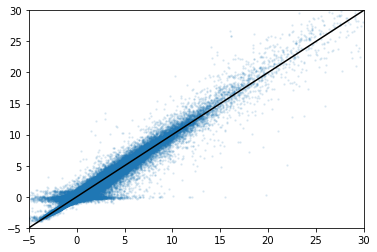

In [27]:
plt.scatter(Y_pred_test, Y_test, alpha=0.1, s=2)

plot_range = [-5, 30]
plt.plot(plot_range, plot_range, c='k')
plt.xlim(*plot_range)
plt.ylim(*plot_range)

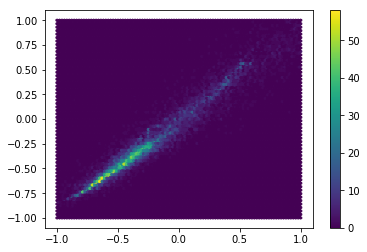

In [28]:
var = 'CO'
var_idx = useful_spec.index(var)

plt.hexbin(Y_pred_test[:,var_idx], Y_test[:,var_idx], extent=(-1, 1, -1, 1))
plt.colorbar()